In [ ]:
!gdown --id 1I2RC2Q-rX9Xq0mn3VqeS_foppznJ97bp &
!pip install kaggle &
! mkdir ~/.kaggle &
! cp kaggle.json ~/.kaggle/ &
! chmod 600 ~/.kaggle/kaggle.json

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=1I2RC2Q-rX9Xq0mn3VqeS_foppznJ97bp
To: /content/kaggle.json
100% 68.0/68.0 [00:00<00:00, 117kB/s]


In [ ]:
! kaggle datasets download abhinavkrjha/dog-breed-classification

100% 112M/112M [00:03<00:00, 52.3MB/s] 
100% 112M/112M [00:03<00:00, 34.4MB/s]


In [ ]:
!unzip dog-breed-classification.zip -d dog-dataset

Archive:  dog-breed-classification.zip
  inflating: dog-dataset/Affenhuahua dog/Image_1.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_10.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_11.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_12.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_13.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_14.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_15.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_16.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_17.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_18.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_19.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_2.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_20.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_21.png  
  inflating: dog-dataset/Affenhuahua dog/Image_22.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_23.jpg  
  inflating: dog-dataset/Affenhuahua dog/Image_24.jpg  
  inflating

In [ ]:
from tensorflow import keras
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

from keras.layers import BatchNormalization, Dropout
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten
from keras.preprocessing.image import ImageDataGenerator

from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

import cv2, os

#Funções auxilia

In [ ]:
def plot_history(history):
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.xlabel('epoch')
    plt.legend(['loss', 'val_loss'], loc='lower left')
    plt.show()

    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.xlabel('epoch')
    plt.legend(['acc', 'val_acc'], loc='upper left')
    plt.show()

In [ ]:
def print_eval(test_images, test_labels):
    test_loss, test_acc = model.evaluate(test_images, test_labels)
    print("Teste Loss:", test_loss)
    print("Teste acurácia:", test_acc)
    y_pred=model.predict(x_test)
    pred=np.argmax(y_pred,axis=1)
    ground = np.argmax(y_test,axis=1)
    print(classification_report(ground,pred))



#Pre processamento e divisão do conjunto de treino, teste e validação

In [ ]:
directory = "/content/dog-dataset"
Name=[]
for file in os.listdir(directory):
    Name+=[file]
    
print(Name)
print(len(Name))

['Bulldog dog', 'Bugg dog', 'Afgan Hound dog', 'Affenhuahua dog', 'American Bulldog dog', 'Beagle dog', 'Borzoi dog', 'Akita dog', 'Auggie dog', 'Alaskan Malamute dog', 'Belgian Tervuren dog', 'Boxer dog', 'Bichon Frise dog', 'Bocker dog']
14


In [ ]:
dict_labels = dict({
                    'Bichon Frise dog':len(os.listdir(directory+'/Bichon Frise dog')), 
                   'Affenhuahua dog': len(os.listdir(directory+'/Affenhuahua dog')), 
                   'Belgian Tervuren dog':len(os.listdir(directory+'/Belgian Tervuren dog')), 
                   'Afgan Hound dog':len(os.listdir(directory+'/Afgan Hound dog')), 
                   'Borzoi dog':len(os.listdir(directory+'/Borzoi dog')), 
                   'Auggie dog':len(os.listdir(directory+'/Auggie dog')), 
                   'Akita dog':len(os.listdir(directory+'/Akita dog')), 
                   'Alaskan Malamute dog':len(os.listdir(directory+'/Alaskan Malamute dog')), 
                   'Boxer dog':len(os.listdir(directory+'/Boxer dog')), 
                   'American Bulldog dog':len(os.listdir(directory+'/American Bulldog dog')), 
                   'Bugg dog':len(os.listdir(directory+'/Bugg dog')), 
                   'Bulldog dog':len(os.listdir(directory+'/Bulldog dog')), 
                   'Beagle dog':len(os.listdir(directory+'/Beagle dog')), 
                   'Bocker dog':len(os.listdir(directory+'/Bocker dog'))
                   })


In [ ]:
y_mapper = dict({
                    'Bichon Frise dog': 0, 
                   'Affenhuahua dog': 1, 
                   'Belgian Tervuren dog': 2, 
                   'Afgan Hound dog': 3, 
                   'Borzoi dog': 4, 
                   'Auggie dog': 5, 
                   'Akita dog': 6, 
                   'Alaskan Malamute dog': 7, 
                   'Boxer dog':8, 
                   'American Bulldog dog': 9, 
                   'Bugg dog': 10, 
                   'Bulldog dog': 11, 
                   'Beagle dog': 12, 
                   'Bocker dog': 13
                   })

In [ ]:
dict_labels

{'Affenhuahua dog': 50,
 'Afgan Hound dog': 50,
 'Akita dog': 49,
 'Alaskan Malamute dog': 50,
 'American Bulldog dog': 48,
 'Auggie dog': 50,
 'Beagle dog': 50,
 'Belgian Tervuren dog': 50,
 'Bichon Frise dog': 50,
 'Bocker dog': 50,
 'Borzoi dog': 50,
 'Boxer dog': 50,
 'Bugg dog': 50,
 'Bulldog dog': 50}

In [ ]:
dataset = []
classe_alvo = []
img_size = 224
# Define o tamanho do batch a ser enviado para memória da GPU
batch_size = 4
epochs = 350

In [ ]:
for file in os.listdir(directory):
    for i in os.listdir(directory+'/'+file):
      # print(i + '->' + file)
      if i.split('.')[1] == 'gif':
        pass
      else:
        img_arr = cv2.imread(os.path.join(directory+'/'+file+'/'+i))[..., ::-1] 
        resized_arr = cv2.resize(img_arr, (img_size, img_size))
        dataset.append(resized_arr)      
        classe_alvo.append(y_mapper[file])
        
classe_alvo = to_categorical(classe_alvo) 

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(dataset, classe_alvo, test_size=0.20, random_state=42, stratify=classe_alvo)

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.10, random_state=42, stratify=y_train)

In [ ]:
print("Total: ", sum(dict_labels.values()))
print("Treino: ", len(x_train))
print("Teste: ", len(x_test))
print("Validação: ", len(x_val))

Total:  697
Treino:  499
Teste:  139
Validação:  56


In [ ]:
# Normaliza os dados, píxels das imagens vão para 0-1
x_test = np.array(x_test)/255
x_test.reshape(-1, img_size, img_size, 1)
y_test = np.array(y_test)

x_train = np.array(x_train)/255
x_train.reshape(-1, img_size, img_size, 1)
y_train = np.array(y_train)

x_val = np.array(x_val)/255
x_val.reshape(-1, img_size, img_size, 1)
y_val = np.array(y_val)

#Modelo scratch

In [ ]:
def def_model():
    model = keras.Sequential()

    model.add(Conv2D(filters=32, kernel_size=5, padding='same', 
                                    activation='relu', input_shape=(224,224,3)) )
    model.add(MaxPooling2D(pool_size=[4,4]))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=64, kernel_size=5, padding='same', 
                                    activation='relu') )
    model.add(MaxPooling2D(pool_size=[4,4]))
    model.add(BatchNormalization())

    model.add(Conv2D(filters=32, kernel_size=5, padding='same', 
                                    activation='relu') )
    model.add(MaxPooling2D(pool_size=[4,4]))
    model.add(BatchNormalization())

    model.add(Flatten())

    model.add(Dense(1024, activation='relu') )
    model.add(Dropout(0.33))

    model.add(Dense(256, activation='relu') )
    model.add(Dropout(0.33))

    model.add(Dense(14, activation='softmax') )


    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    model.summary()

    return model

In [ ]:
meus_callbacks = [
        keras.callbacks.EarlyStopping(patience=15),
        keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.1,
                                          patience=5, min_lr=0.00001), 
        keras.callbacks.ModelCheckpoint(
            save_best_only=True,
            filepath='best_model.h5')
]

In [ ]:
model = def_model()

tf.random.set_seed(42)
history = model.fit(
                      x_train, y_train, 
                      batch_size=batch_size,
                      epochs=epochs, 
                      callbacks = meus_callbacks, 
                      validation_data=(x_val, y_val)
                    )

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 56, 56, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 56, 56, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 56, 56, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 64)       0         
 2D)                                                             
                                                        

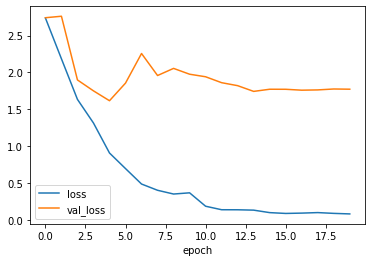

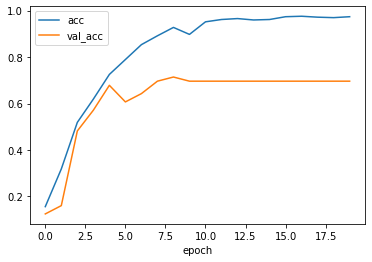

5/5 [==============================] - 1s 36ms/step - loss: 1.5839 - accuracy: 0.6906
Teste Loss: 1.5838831663131714
Teste acurácia: 0.6906474828720093
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.57      0.40      0.47        10
           2       0.43      0.30      0.35        10
           3       0.82      0.90      0.86        10
           4       0.57      0.80      0.67        10
           5       0.86      0.60      0.71        10
           6       0.80      0.80      0.80        10
           7       0.75      0.90      0.82        10
           8       0.71      0.50      0.59        10
           9       0.50      0.50      0.50        10
          10       0.78      0.70      0.74        10
          11       0.70      0.78      0.74         9
          12       0.60      0.60      0.60        10
          13       0.75      0.90      0.82        10

    accuracy                        

In [ ]:
plot_history(history)
print_eval(x_test, y_test)

#Modelo InceptionV3 - Transfer learning
Documentação da arquitetura [InceptionV3](https://keras.io/api/applications/inceptionv3/), os pesos utilizados foram da imagenet.

In [ ]:
def def_model_2(flag):
    base_model = tf.keras.applications.InceptionV3(
        input_shape=(224, 224, 3),
        include_top=False,
        weights="imagenet"
    )

    #Transfer learning
    if flag == False:
      print("---------------------------------Iniciando o modelo com Transfer learning---------------------------------")
      base_model.trainable = False
    #Fine-tuning
    else:
      print("---------------------------------Iniciando o modelo com Fine-tuning---------------------------------")
      base_model.trainable = True

    # exibe o modelo
    base_model.summary()

    print("Números de layers do modelo base (transfer learning): ",
            len(base_model.layers))

    x = base_model.output

    x = tf.keras.layers.GlobalAveragePooling2D()(x)

    x = tf.keras.layers.Dropout(0.33)(x)
    
    # fully-connected layer
    x = Dense(1024, activation='relu')(x)

    # logistic layer -- 14 classes
    predictions = Dense(14, activation='softmax')(x)

    # this is the model we will train
    model = Model(inputs=base_model.input, outputs=predictions)

    base_learning_rate = 0.00001 
    model.compile(optimizer=tf.keras.optimizers.Adam(lr=base_learning_rate),
                    loss="categorical_crossentropy",
                    metrics=['accuracy'])

    # exibe o modelo completo
    model.summary()

    return model

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(499, 224, 224, 3)
(499, 14)
(139, 224, 224, 3)
(139, 14)


In [ ]:
model = def_model_2(False)

tf.random.set_seed(42)

history = model.fit(x_train, y_train, batch_size=batch_size,
                        epochs=epochs, callbacks = meus_callbacks, validation_data=(x_val, y_val))

---------------------------------Iniciando o modelo com Transfer learning---------------------------------


UnboundLocalError: ignored

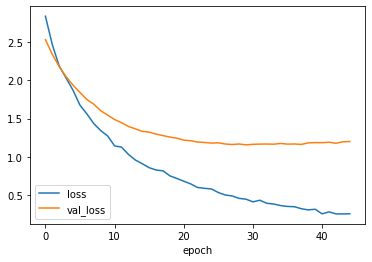

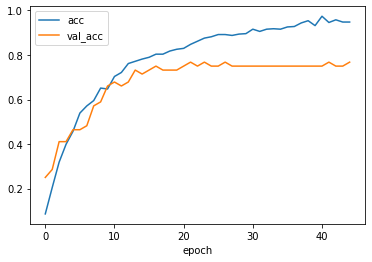

5/5 [==============================] - 2s 78ms/step - loss: 0.8946 - accuracy: 0.8058
Teste Loss: 0.8946453332901001
Teste acurácia: 0.8057553768157959
              precision    recall  f1-score   support

           0       0.77      1.00      0.87        10
           1       0.88      0.70      0.78        10
           2       0.60      0.60      0.60        10
           3       0.90      0.90      0.90        10
           4       0.80      0.80      0.80        10
           5       0.78      0.70      0.74        10
           6       0.90      0.90      0.90        10
           7       1.00      1.00      1.00        10
           8       0.83      0.50      0.62        10
           9       0.82      0.90      0.86        10
          10       0.82      0.90      0.86        10
          11       0.70      0.78      0.74         9
          12       0.58      0.70      0.64        10
          13       1.00      0.90      0.95        10

    accuracy                        

In [ ]:
plot_history(history)
print_eval(x_test, y_test)

#Modelo InceptionV3 - Fine-tuning

In [ ]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(499, 224, 224, 3)
(499, 14)
(139, 224, 224, 3)
(139, 14)


In [ ]:
model = def_model_2(True)

tf.random.set_seed(42)

history = model.fit(x_train, y_train, batch_size=batch_size,
                        epochs=epochs, callbacks = meus_callbacks, validation_data=(x_val, y_val))

---------------------------------Iniciando o modelo com Fine-tuning---------------------------------
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_16 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1422 (Conv2D)           (None, 111, 111, 32  864         ['input_16[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1422 (Batc  (None, 111, 111, 32  96         ['conv2d_1422[0][0]'

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1438 (Batc  (None, 25, 25, 96)  288         ['conv2d_1438[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 activation_1423 (Activation)   (None, 25, 25, 48)   0           ['batch_normalization_1435[0][0]'
                                                                 ]                                
                                                                                                  
 activation_1426 (Activation)   (None, 25, 25, 96)   0           ['batch_normalization_1438[0][0]'
                                                                 ]                                
          

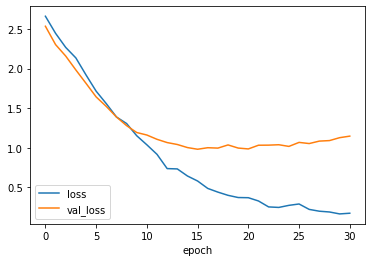

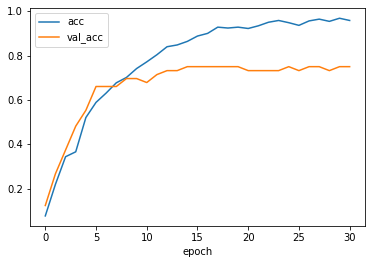

5/5 [==============================] - 2s 73ms/step - loss: 1.0381 - accuracy: 0.7410
Teste Loss: 1.038084864616394
Teste acurácia: 0.7410072088241577
              precision    recall  f1-score   support

           0       0.62      1.00      0.77        10
           1       0.80      0.40      0.53        10
           2       1.00      0.40      0.57        10
           3       0.90      0.90      0.90        10
           4       0.62      0.80      0.70        10
           5       0.67      0.80      0.73        10
           6       0.62      0.80      0.70        10
           7       1.00      1.00      1.00        10
           8       0.67      0.40      0.50        10
           9       0.88      0.70      0.78        10
          10       1.00      0.90      0.95        10
          11       0.88      0.78      0.82         9
          12       0.43      0.60      0.50        10
          13       0.82      0.90      0.86        10

    accuracy                         

In [ ]:
plot_history(history)
print_eval(x_test, y_test)

#Testes utilizando Data Augmentation 

In [ ]:
def datagen(x_train):
    datagen = ImageDataGenerator(
            featurewise_center=False,  # set input mean to 0 over the dataset
            samplewise_center=False,  # set each sample mean to 0
            featurewise_std_normalization=False,  # divide inputs by std of the dataset
            samplewise_std_normalization=False,  # divide each input by its std
            zca_whitening=False,  # apply ZCA whitening
            # zca_epsilon=1e-06,
            brightness_range=[0.5, 1.0],
            # randomly rotate images in the range (degrees, 0 to 180)
            rotation_range=30,
            zoom_range=[0.5, 1.0],  # Randomly zoom image
            # randomly shift images horizontally (fraction of total width)
            width_shift_range=0.1,
            # randomly shift images vertically (fraction of total height)
            height_shift_range=0.1,
            horizontal_flip=True,  # randomly flip images
            vertical_flip=False)  # randomly flip images

    x_train = datagen.flow(x_train, batch_size=x_train.shape[0], shuffle=False, seed=42)
    return x_train

In [ ]:
x_train1 = datagen(x_train)
x_train1 = x_train1[0]
x_train1 = np.array(x_train1)/255
x_train1.reshape(-1, img_size, img_size, 1)

array([[[[0.2901961 ],
         [0.43529412],
         [0.5647059 ],
         ...,
         [0.6156863 ],
         [0.47058824],
         [0.5294118 ]],

        [[0.60784316],
         [0.4509804 ],
         [0.5137255 ],
         ...,
         [0.20784314],
         [0.21568628],
         [0.22745098]],

        [[0.2       ],
         [0.21568628],
         [0.23529412],
         ...,
         [0.13725491],
         [0.00392157],
         [0.00392157]],

        ...,

        [[0.02745098],
         [0.04313726],
         [0.03137255],
         ...,
         [0.43529412],
         [0.38039216],
         [0.3372549 ]],

        [[0.44705883],
         [0.54509807],
         [0.627451  ],
         ...,
         [0.07843138],
         [0.24313726],
         [0.13333334]],

        [[0.05490196],
         [0.23137255],
         [0.11764706],
         ...,
         [0.05882353],
         [0.07058824],
         [0.05098039]]],


       [[[0.03921569],
         [0.05098039],
         [0.05

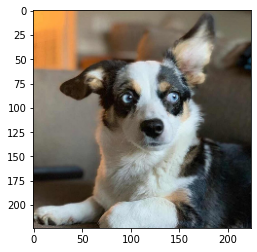

In [ ]:
plt.imshow(x_train[2])

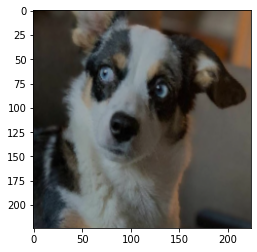

In [ ]:
plt.imshow(x_train1[2])

##Scratch


In [ ]:
model = def_model()

tf.random.set_seed(42)
history = model.fit(x = x_train1, y = y_train,
                    validation_data = (x_val, y_val),
                    batch_size=batch_size,
                    callbacks = meus_callbacks,
                    epochs=epochs)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_573 (Conv2D)         (None, 224, 224, 32)      2432      
                                                                 
 max_pooling2d_33 (MaxPoolin  (None, 56, 56, 32)       0         
 g2D)                                                            
                                                                 
 batch_normalization_573 (Ba  (None, 56, 56, 32)       128       
 tchNormalization)                                               
                                                                 
 conv2d_574 (Conv2D)         (None, 56, 56, 64)        51264     
                                                                 
 max_pooling2d_34 (MaxPoolin  (None, 14, 14, 64)       0         
 g2D)                                                            
                                                      

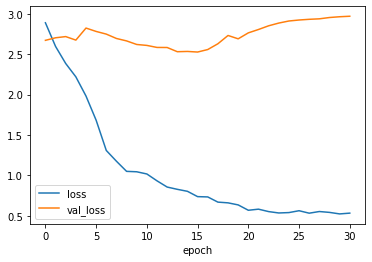

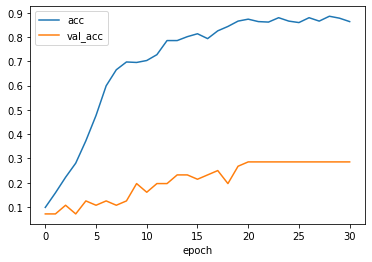

5/5 [==============================] - 0s 12ms/step - loss: 2.9071 - accuracy: 0.3094
Teste Loss: 2.9070777893066406
Teste acurácia: 0.3093525171279907
              precision    recall  f1-score   support

           0       0.39      0.70      0.50        10
           1       0.17      0.10      0.12        10
           2       0.17      0.10      0.12        10
           3       0.33      0.40      0.36        10
           4       0.27      0.30      0.29        10
           5       0.40      0.40      0.40        10
           6       0.20      0.10      0.13        10
           7       0.33      0.50      0.40        10
           8       0.00      0.00      0.00        10
           9       0.33      0.60      0.43        10
          10       0.56      0.50      0.53        10
          11       0.27      0.44      0.33         9
          12       0.25      0.10      0.14        10
          13       0.11      0.10      0.11        10

    accuracy                        

In [ ]:
plot_history(history)
print_eval(x_test, y_test)

##InceptionV3 - Transfer Learning

In [ ]:
model = def_model_2(False)

tf.random.set_seed(42)
history = model.fit(
                      x_train1, y_train, 
                      batch_size=batch_size,
                      epochs=epochs, 
                      callbacks = meus_callbacks, 
                      validation_data=(x_val, y_val)
                    )

---------------------------------Iniciando o modelo com Transfer learning---------------------------------
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_13 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1140 (Conv2D)           (None, 111, 111, 32  864         ['input_13[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1140 (Batc  (None, 111, 111, 32  96         ['conv2d_1140[

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


                                                                 ]                                
                                                                                                  
 activation_1144 (Activation)   (None, 25, 25, 96)   0           ['batch_normalization_1156[0][0]'
                                                                 ]                                
                                                                                                  
 average_pooling2d_109 (Average  (None, 25, 25, 256)  0          ['mixed0[0][0]']                 
 Pooling2D)                                                                                       
                                                                                                  
 conv2d_1152 (Conv2D)           (None, 25, 25, 64)   16384       ['mixed0[0][0]']                 
                                                                                                  
 conv2d_11

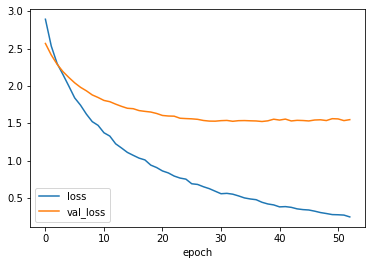

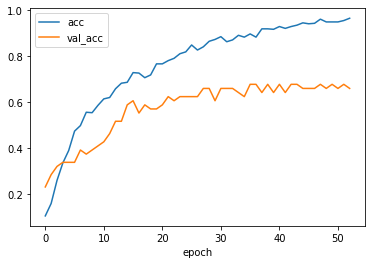

5/5 [==============================] - 2s 66ms/step - loss: 1.1913 - accuracy: 0.6835
Teste Loss: 1.1912660598754883
Teste acurácia: 0.6834532618522644
              precision    recall  f1-score   support

           0       0.67      1.00      0.80        10
           1       0.70      0.70      0.70        10
           2       0.62      0.50      0.56        10
           3       0.75      0.60      0.67        10
           4       1.00      0.70      0.82        10
           5       0.78      0.70      0.74        10
           6       1.00      0.50      0.67        10
           7       0.82      0.90      0.86        10
           8       0.56      0.50      0.53        10
           9       0.67      0.80      0.73        10
          10       0.69      0.90      0.78        10
          11       0.45      0.56      0.50         9
          12       0.56      0.50      0.53        10
          13       0.58      0.70      0.64        10

    accuracy                        

In [ ]:
plot_history(history)
print_eval(x_test, y_test)

##InceptionV3 - Fine Tuning

In [ ]:
model = def_model_2(True)

tf.random.set_seed(42)
history = model.fit(
                      x_train1, y_train, 
                      batch_size=batch_size,
                      epochs=epochs, 
                      callbacks = meus_callbacks, 
                      validation_data=(x_val, y_val)
                    )

---------------------------------Iniciando o modelo com Fine-tuning---------------------------------
Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_17 (InputLayer)          [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv2d_1516 (Conv2D)           (None, 111, 111, 32  864         ['input_17[0][0]']               
                                )                                                                 
                                                                                                  
 batch_normalization_1516 (Batc  (None, 111, 111, 32  96         ['conv2d_1516[0][0]'

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1530 (Batc  (None, 25, 25, 64)  192         ['conv2d_1530[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1533 (Batc  (None, 25, 25, 96)  288         ['conv2d_1533[0][0]']            
 hNormalization)                                                                                  
                                                                                                  
 batch_normalization_1534 (Batc  (None, 25, 25, 64)  192         ['conv2d_1534[0][0]']            
 hNormalization)                                                                                  
          

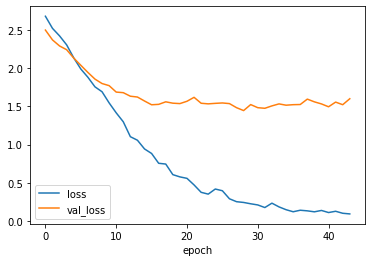

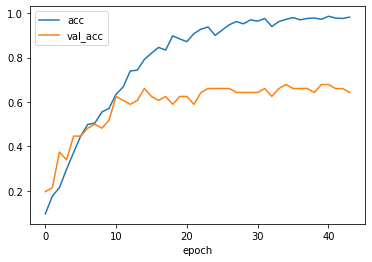

5/5 [==============================] - 2s 72ms/step - loss: 1.4593 - accuracy: 0.6475
Teste Loss: 1.4593092203140259
Teste acurácia: 0.6474820375442505
              precision    recall  f1-score   support

           0       0.50      1.00      0.67        10
           1       0.70      0.70      0.70        10
           2       0.83      0.50      0.62        10
           3       0.73      0.80      0.76        10
           4       0.73      0.80      0.76        10
           5       0.60      0.60      0.60        10
           6       0.75      0.30      0.43        10
           7       0.62      1.00      0.77        10
           8       0.40      0.20      0.27        10
           9       0.70      0.70      0.70        10
          10       0.90      0.90      0.90        10
          11       1.00      0.33      0.50         9
          12       0.40      0.60      0.48        10
          13       0.75      0.60      0.67        10

    accuracy                        

In [ ]:
plot_history(history)
print_eval(x_test, y_test)